
# `CV TEAM 과제` 2편 (신경망)
<img src="../resource/images/42LABS.png" width="200">

`제작` : `hocjeong(wjdghcks02@gmail.com)`

---

# `[⭐과제 진행시 유의사항⭐]`
- 본 과제는 코드로 구현하면서 학습하는 과제입니다.
- 본 과제는 `Google Colab`에서 실행하는 것을 권장합니다! 
- **해당 디렉토리 전체를 업로드 후 실행해주세요, 만약 주피터 노트북만 코랩에서 실행시 이미지가 깨져 보일 수 있습니다!!**
- 만약 `local`에서 실행시 필요한 라이브러리는 설치해 주세요!! 

- 해당 과제는 2개의 요소로 구성되어 있습니다.
    - 1. `[개념 설명 및 예시]`
    - 2. `[TODO]`
- 개념 설명이 경우 해당 부분을 읽으시면서 복습하시면 됩니다.
- 해당 개념에 대한 이해를 바탕으로 **`[TODO]`** 부분을 직접 작성하시면 됩니다.
- **과제를 수행하시다가 궁금한 사항이나 오류 발생시 `hocjeong`에게 문의 해주시면 됩니다!!**

---

# 목차
- [1. 신경망](#1-신경망-neural-network)
    - [1.1 신경망의 구조](#11-신경망의-구조)
- [2. 활성화 함수](#2-활성화-함수-activation-function)
    - [2.1 계단함수의 한계점](#21-계단함수의-한계점)
    - [2.2 활성화 함수의 종류](#22-활성화-함수의-종류)
        - [2.2.1 시그모이드](#221-시그모이드-함수-sigmoid)
            - [시그모이드 구현](#sigmoid-함수-구현)
        - [2.2.2 하이퍼볼릭 탄젠트](#222-하이퍼볼릭-탄젠트-함수-tanh)
            - [하이퍼볼릭 탄젠트 구현](#tanh-함수-구현)
        - [2.2.3 렐루](#223-렐루-함수-relu)
            - [TODO 1 ReLU 함수 구현하기](#todo-1-relu-함수-구현하기)
        - [2.2.4 리키 렐루](#224-리키-렐루-leaky-relu)
            - [리키 렐루 구현](#leaky-relu-함수-구현)
- [3. 다차원 배열의 계산](#3-다차원-배열-계산)
    - [3.1 다차원 배열](#31-다차원-배열)
    - [3.2 행렬의 곱](#32-행렬의-곱)
        - [TODO 2 행렬의 곱 직접 구현하기](#todo-2-행렬의-곱을-직접-구현하기-not-use-numpy-)
    - [3.3 신경망에서 행렬곱](#33-신경망에서-행렬곱)
        - [TODO 3 3층 신경망 구현하기](#todo-3-3층-신경망-구현하기)
- [4. 출력층 설계하기](#4-출력층-설계하기)
    - [4.1 항등함수](#41-항등함수)
    - [4.2 소프트맥스 함수](#42-소프트맥스-함수)
    - [4.3 소프트맥스 함수 구현하기](#43-소프트맥스-함수-구현하기)
---

# 1. 신경망 (neural network)
앞 장에서 복습한 `퍼셉트론`으로 복잡한 함수를 표현할 수도 있습니다. 이론상 컴퓨터의 동작도 퍼셉트론으로 구현할 수 있습니다.  
하지만 단점은 `가중치`를 조절하는 방법은 우리가 수동으로 해야한다는 것입니다.  

신경망은 이러한 단점을 해결해 줍니다. 쉽게 말해서 신경망은 가중치조절을 자동으로 할 수 있습니다.

## 1.1 신경망의 구조
<img src="../resource/images/02/neural_network.png" width="400">  

신경망은 크게 `입력층`, `은닉층`, `출력층`으로 구성되어 있습니다.
사진으로만 보았을때는 신경망과 퍼셉트론의 차이가 잘 보이지 않습니다.    
**(사실 `신경망은` `단층 퍼셉트론`을 여러 층으로 쌓아 올린 `다층 퍼셉트론`과 같습니다.)**  
실제로 뉴런이 연결되는 방식은 퍼셉트론과 똑같습니다.  

`잠깐 퍼셉트론을 복습해 볼까요?`
퍼셉트론을 식으로 표현하면 다음과 같습니다.  
<img src="../resource/images/01/perceptron_3.png" width="300"> 

여기서 `b 는 편향`을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화 되느냐를 제어합니다.  
한편 `w1`과 `w2`는 각 신호의 `가중치`를 나타내는 매개변수로, 각 신호의 영향력을 제어합니다.  
즉, 퍼셉트론은 1(편향), x1, x2 라는 3개의 신호가 뉴런에 입력되어서 각 신호에 가중치를 곱한 후 다음 뉴런에 전달하는 과정입니다.  

다음 뉴런에서는 이러한 신호들의 값을 더하여 그 합이 0을 넘으면 1, 그렇지 않으면 0을 출력합니다.  
따라서 이 함수를 `h(x)`라고 하면 아래 처럼 퍼셉트론을 표현할 수 있습니다.  
<img src="../resource/images/02/h_x.png" width="400">  

즉, 입력신호의 총합이 `h(x)`라는 함수를 거쳐서 변환되어, 그 변환 값이 y의 출력이 되는 것입니다.  
`h(x)`가 0을 넘기면 1을 돌려주고 그렇지 않으면 0을 넘겨줍니다.  

# 2 활성화 함수 (activation function)
방금 등장했던 `h(x)`처럼 입력 신호의 총합을 출력신호로 변환하는 함수를 일반적으로 `활성화 함수 activate function` 이라고 합니다. 

활성화라는 이름이 말해주듯 활성화 함수는 `입력신호의 총합이 활성화를 일으키는지`를 정하는 역할을 합니다. 
즉, 식을 다시 정리하자면 2단계로 구성할 수 있습니다.

<img src="../resource/images/02/a.png" width="400">  
<img src="../resource/images/02/h_x_2.png" width="150">  

먼저 가중치가 달린 입력 신호와 편향의 총합을 계산하고, 이를 `a`라고 합니다. 그리고 `a`를 `h()`에 넣어서 `y`를 출력하는 과정으로 나눌 수 있습니다.  

지금까지의 과정(활성화 함수까지 합쳐진)을 퍼섭트론 처럼 그림으로 표현하면 아래와 같이 표현할 수 있습니다.   
<img src="../resource/images/02/neural_network_activate.png" width="400">  

기존의 뉴런원이 커지고 안에 활성화 함수의 처리과정이 추가되었습니다.  
즉, 가중치 신호를 조합한 결과가 `a` 라는 노드에 저장이 되고 활성화 함수 `h()`를 톻ㅇ해서 y라는 노드로 변환되는 과정이 표현되고 있습니다.  

일반적으로 위 과정을 그냥 단순한 하나의 원으로 표현 하기도 합니다 (하지만 안에 위 과정이 모두 포함되어 있습니다.)  
명시적으로 표현하기 위해서는 위 그림처럼 표현하면됩니다.  

## 2.1 계단함수의 한계점
퍼셉트론에서는 활성화 함수로 `계단함수`를 사용합니다.  
그러나 신경망으로 발전하기 위해서는 `계단함수` 이외의 `활성화 함수`를 사용해야합니다.  

왜 그럴까요? 뒤에서 배우겠지만 2가지 문제가 있습니다.  
`1. 기울기 소실문제 vanishing gredient `  
- 앞에서 말한 것 처럼 `신경망`은 가중치를 자동으로 업데이트 합니다. 나중에 배울 `역전파`를 통해서 가중치를 업데이트 합니다.  
- 이는 합성함수의 `연쇄법칙`을 이용해서 미분을 통해서 기울기를 구하고 이를 통한 경사하강법을 수행하는 것을 의미합니다.  
- 그러나 계단함수를 활성화 함수로 쓰게되면 `(계단 함수의 경우 거의 모든지점에서 기울기가 0이기 때문에)` 기울기를 활용한 업데이트가 불가능하게 됩니다. 

`2. 비선형성의 한계`
- 계단함수는 (0/1)의 출력만을 생성합니다. 이는 은닉층에 풍부한 정보를 전달하지 못한다는 단점이 있습니다.  
- 따라서 계단형 함수의 사용은 복잡한 비선형성을 학습하는데 방해가 됩니다.  

`여기에서는 기울기가 왜 0이 되는지에 대한것을 확인하겠습니다 !!`  
우선 계단함수를 구현해 봅시다. (매우 간단합니다)  

In [22]:
# 계단함수
def step_function(x):
    if x > 0:
        return (1)
    return (0)

간단하게 입력되는 신호가 0보다 크면 1 아니면 0을 출력하게 해주면됩니다.  

좀더 간단하게 구현하면 (numpy를 활용하여) 다음과 같이도 표현할 수 있습니다.

In [23]:
import numpy as np

def step_function(x:np.array):
    y = x > 0
    return y.astype(int)

def step_function_real_simple(x):
    return np.where(x > 0, 1, 0)

여기서 입력되는 x 는 `numpy array`입니다  
쉽게 설명하자면 `np.array([-1.0, 1.0, 2.0])`이라는 x가 입력되면 `y = x > 0` 부분에서 0보다 큰 값은 `True`, 아니면 `False`로 변환됩니다.  
즉, `np.array([False, True, True])`가 되는 것입니다. 그리고 마지막에 이를 `np.int`로 형변환 해주기 때문에  
`np.array([0, 1, 1])`이 반환되는 것입니다.  

사실 `real_simple` 버전이 진짜 간단한 구현입니다. `np.where`은 들어온 배열에서 0보다 큰값을 찾아서 1 아니면 0으로 반환하는 것입니다. (삼항연산자와 유사합니다)

위에서 작성한 `계단함수`를 시각화 하면 다음과 같습니다. 

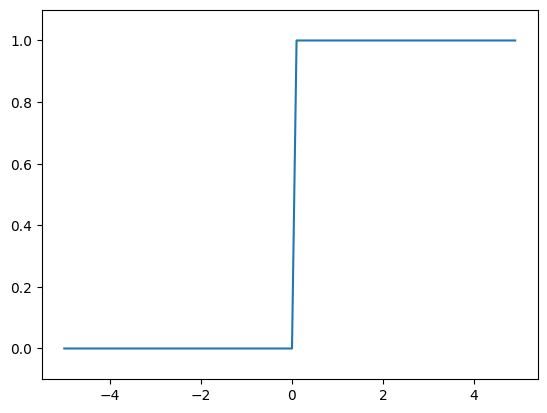

In [24]:
# 계단함수 시각화화
import numpy as np
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

왜 계단함수라고 불리는지 알 수 있겠죠?  
사진에서 확인할 수 있듯이 계단 함수는 0을 경계로 출력이 0에서 1로 바뀝니다.  

그럼 계단함수의 도함수를 시각화 해볼까요?  
<img src="../resource/images/02/diff_step_function.png" width="700">  

왼쪽의 계단함수를 미분한 도함수가 오른쪽 그래프입니다.  
기울기가 모든 구간에서 0이라는 것을 알 수 있습니다.  
왜 기울기가 손실되는지를 알 수 있겠죠??? 


## 2.2 활성화 함수의 종류
계단함수의 한계점을 살펴보았으니, 이를 해결하는 다른 `활성화 함수`들을 살펴봅시다.  
사실 다층퍼셉트론의 활성화 함수를 계단 함수 이외의 활성화 함수로 변경해주면 이것이 `신경망`입니다!!  

사실 활성화 함수의 종류는 엄청 많습니다. (현대에는 500여개가 있습니다!!!)  
이번 시간에는 대표적인 `시그모이드`, `탄젠트 하이퍼볼릭`, `렐루`, `리키 렐루`에 대해서 살펴보겠습니다.  

각 활성화 함수들의 공통점은 `비선형 함수`라는 것입니다. (따라서 활성화 함수를 비선형 함수라고 부르기도 합니다.)  
심지어 `계단함수`도 비선형 함수입니다.  

**왜 비선형 함수를 활성화 함수로 사용해야할까요?**  

우리가 신경망을 구성하는 이유, 즉, 다층 퍼셉트론 같이 복잡한 구조를 만드는 이유는 `비선형 문제`를 해결하기 위해서 입니다.  
따라서 단순하게 `선형 함수`를 사용해서 `다층을`구성한다고 한다면 사실 이는 `하나의 선형식일 뿐입니다`  
즉, 아무리 많은 층을 쌓아도 선형함수를 활성화 함수로 사용하면 다층의 의미가 사라지는 것입니다.

정리하자면 비선형성을 해결하기 위해서 `비선형 함수`를 `활성화 함수`로 활용하는 것입니다  

### 2.2.1 시그모이드 함수 sigmoid

가장 처음에 사용되었던 활성화 함수에는 `sigmoid`함수가 있습니다.  
(활성화 함수의 어머니 같은 존재입니다)  

`시그모이드 함수`의 수식은 다음과 같습니다.    
<img src="../resource/images/02/sigmoid.png" width="300">  

처음 보면 복잡해 보이지만 출력은 간단합니다.  (`e`는 자연상수 2.7182... 입니다)  
입력을 0~1 사이의 값으로 변환시켜줍니다.  

시그모이드 함수를 시각화 하면 다음과 같습니다.  

<img src="../resource/images/02/sigmoid_graph.png" width="600">  

`[시그모이드 장점]`
- 출력을 `확률`로 해석할 수 있습니다.
- 이진분류 문제에서 사용이 용이합니다.  

`[시그모이드 단점]`  
- 입력값의 크기가 크거나 작을 때, 함수의 출력값이 급격하게 변화합니다. 
<img src="../resource/images/02/sigmoid_graph_diff.png" width="600">    

왜 문제일까요? -> 위 그래프는 시그모이드 함수의 도함수를 시각화한 그래프입니다.  
해당 그래프에서 알 수 있듯이 x = 0 일때 기울기가 0.2가 최대이고 일정값으로 올라가거나 내려갈때 0에 가까워 집니다.  
따라서 이는 계단함수의 단점처럼 `역전파`를 통한 가중치 업데이트 과정에서 `기울기 소실 vanishing gradient`의 문제가 발생할 수 있습니다.  

따라서 깊은 모델을 구성할때 `시그모이드` 함수를 활성화 함수로 사용하면 학습이 잘 되지 않습니다. 

- 시그모이드 함수는 `zero-centered` 하지않습니다.  
`zero-centered` 하지 않다는 말은 시그모이드 함수의 중앙값이 0이 아니라는 소리입니다.  
위에 시그모이드 함수를 시각화 한 그래프를 보면 알 수 있듯이  
시그모이드의 최소값은 0에 가까운 값이고고 최댓값은 1에 가까운 값입니다.  

즉, 출력값이 `양수`로만 출력됩니다.  
따라서 가중치 업데이트 과정에서 -는 -로만 업데이트 되고 + 경우 + 로만 업데이트가 됩니다.  
이러한 문제점을 `zig-zag 문제`라고 하고`모델의 수렴속도가 느려지는 원인이 됩니다.`  

<img src="../resource/images/02/zigzag.png" width="600">

이제 sigmoid 함수를 직접 구현해 봅시다.

### sigmoid 함수 구현

In [25]:
# sigmoid 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

위 공식 처럼 똑같이 구현해주면됩니다. 

출력을 확인해 볼까요?  

In [26]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

모든 입력값이 0~1 사이의 값으로 변환되는 것을 확인할 수 있습니다.  
이제 직접구현한 sigmoid 함수를 시각화 해봅시다.

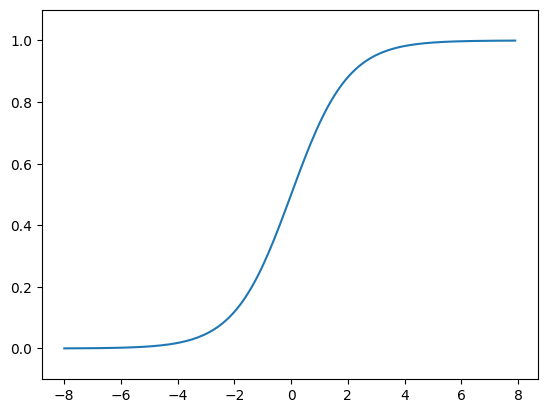

In [27]:
x = np.arange(-8.0, 8.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

위에서 확인했던 sigmoid 시각화와 같다는 것을 알 수 있습니다. 

### 2.2.2 하이퍼볼릭 탄젠트 함수 tanh
하이퍼볼릭 탄젠트 함수 -> `탄젠트` 는 `시그모이드`를 변형한 쌍곡선 함수 입니다.

수식은 다음과 같습니다.  

<img src="../resource/images/02/tanh.png" width="300">

시각화 하면 다음과 같은 모습이 나옵니다.  
<img src="../resource/images/02/tanh_graph.png" width="600">  

모양은 시그모이드와 유사하죠?  
하지만 범위가 다릅니다.  
기존 시그모이드는 0~1 이었다면  
`탄젠트`는 -1~1의 값으로 출력됩니다.  

`[탄젠트의 장점]`
- 기존 `sigmoid` 함수의 단점이었던 `non-zerocenterd` 한 문제를 해결하였습니다.  
위 그래프에서 확인할 수 있듯이 중앙값이 0이기 때문에 `non-zerocentered`한 문제가 없습니다.

<img src="../resource/images/02/tanh_graph_diff.png" width="600">  

- 또한 시그모이드 함수와 미분 값을 비교해보았을때, 탄젠트의 최대 미분값은 1로 시그모이드 보다 높습니다.  
따라서 더 깊은 모델의 학습에 용이합니다. 


`[탄젠트의 단점]`
- 그러나 여전히 최대, 최소에 가까운 값으로 향할때, 미분에 0에 가깝기 때문에 기울기 소실의 문제는 여전히 남아있습니다.

### tanh 함수 구현
그러면 탄젠트 함수를 구현해볼까요?

In [28]:
# tanh 함수
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

수식을 그대로 구현했습니다.  
이제 출력을 확인해 볼까요?  

In [29]:
x = np.array([-1.0, 1.0, 2.0])
tanh(x)

array([-0.76159416,  0.76159416,  0.96402758])

-1 ~ 1 사이의 값으로 출력되는 것을 볼 수 있습니다.  
이제 구현한 tanh를 직접 시각화 해보겠습니다.

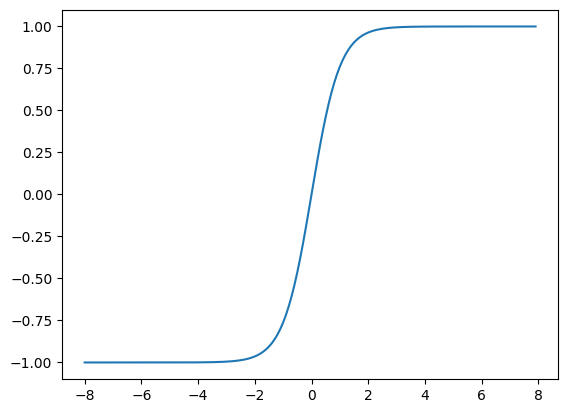

In [30]:
#tanh 시각화
x = np.arange(-8.0, 8.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

위에서 보았던 시각화와 같다는 것을 알 수 있습니다.

좀더 간단한 방법이 있습니다.  
사실 tanh의 분자는 -> `sin 함수`이고 분모는 -> `cos 함수`입니다.  
이를 활용해서 tanh를 좀더 간단하게 구현 하면 아래와 같습니다. 

In [31]:
import math
def tanh(x):
    return math.sin(x) / math.cos(x)

### 2.2.3 렐루 함수 ReLU
렐루 함수는 요즘 딥러닝 모델에서 가장 많이 사용되는 활성화 함수중 하나입니다.  
`모르겠으면 ReLU를 써라`라고 할 정도니까요  

렐루의 공식은 다음과 같습니다.  
<img src="../resource/images/02/relu.png" width="300">

다른 활성화 함수(수식을 써야하는...)보다 구현은 더욱 간단합니다.  
0보다 큰 값은 그대로 가고 아닌 경우에는 0으로 바꿔주면 됩니다.  

ReLU를 시각화 하면 다음과 같습니다.   
<img src="../resource/images/02/relu_graph.png" width="600">

<img src="../resource/images/02/relu_graph_diff.png" width="600">

`[ReLU의 장점]`
- 함수의 연산이 빠르다 (간단하기 때문에)
- 입력값이 양수인 경우 gradient가 1로 유지되기 때문에 기울기 소실 문제가 없다.

`[ReLU의 단점]`
- 입력값이 음수인 경우 gradient가 0이 되기 때문에 죽어버리는 경우가 발생 (R.I.P)
- 또한 ReLU는 `non-zerocentered`하기 때문에 `zigzag 문제`가 발생한다. 

### TODO 1 `ReLU` 함수 구현하기
그럼 이제 `ReLU`함수를 직접 구현해 봅시다.  

`[힌트]`
- `np.maximum`을 활용해보세요 !!


In [ ]:
#TODO 1 ReLU 구현하기

#아래 ReLU 함수를 완성해 주세요!!
def ReLU(x):
    pass

구현하셨나요?  
제대로 구현되었는지 확인해 봅시다!!!

In [ ]:
from test_code import TEST_RELU

TEST_RELU(ReLU)

100점이라고 나오시나요?  
이번에는 제대로 구현되었는지 시각화 해봅시다.  


In [ ]:
#ReLU 시각화
x = np.arange(-8.0, 8.0, 0.1)
y = ReLU(x)
plt.plot(x, y)
plt.ylim(-1.1, 1.1)
plt.show()

### 2.2.4 리키 렐루 Leaky ReLU
앞서 살펴본 `ReLU`의 경우 음수인 경우 값이 죽어버리는 문제점이 있었습니다.  
이를 `Dying ReLU`라고 하는데 이러한 문제점을 해결한 또다른 활성화 함수가 `Leaky ReLU`입니다.  

`리키 렐루`의 공식은 다음과 같습니다.  
<img src="../resource/images/02/leaky_relu.png" width="300">

한번 시각화 해볼까요? 

<img src="../resource/images/02/leaky_relu_graph.png" width="600">

기존 `ReLU`와 다른점은 음수일때, 일정부분 값을 보장해준다는 것입니다.  
이를 미분해서 시각화 하면 아래 사진의 노란색 입니다  

<img src="../resource/images/02/leaky_relu_graph_diff.png" width="600">

### Leaky ReLU 함수 구현


In [32]:
# Leaky ReLU 함수 구현
def LeakyReLU(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x) # 참고로 0.01은 alpha로 하이퍼파라미터로 조정이 가능하다.

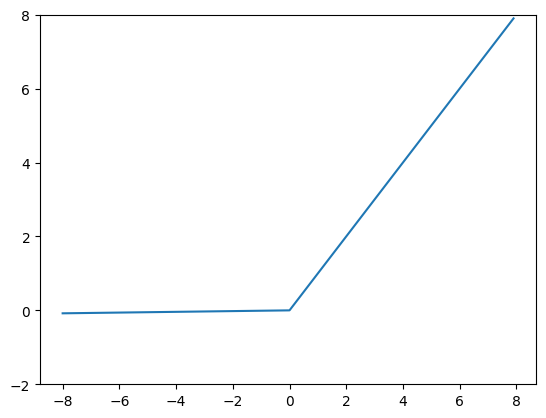

In [33]:
# Leaky ReLU 시각화
x = np.arange(-8.0, 8.0, 0.1)
y = LeakyReLU(x)
plt.plot(x, y)
plt.ylim(-2, 8)
plt.show()

---

이외에도 `GELU` (transformer에서 많이 사용된다), `ELU`, `Swish` 등 다양한 활성화 함수들이 존재하고 있습니다.  
궁금하시다면 직접 찾아보고 구현해보세요!! 


# 3. 다차원 배열 계산
`신경망`이라고 하니까 뭔가 복잡한 연산들로 이루어진 집합이라는 느낌을 받을 것입니다!!  
해당연산을 언제 `for`문 돌리면서 하지? 라는 생각이 들수도 있습니다.  
하지만 이를 다차원 배열 연산 (행렬의 연산)이라고 생각하면 문제는 간단해 집니다.  

따라서 다차원 배열을 잘 다룰수 있다면 앞으로의 신경망을 구현하는데 효율적일 것입니다.  
이번 파트에서는 이러한 `다차원 배열 (행렬 .. )`을 잘 다루도록 연습해봅시다!!  

## 3.1 다차원 배열?
다차우너 배열도 그 기본은 `숫자의 집합`입니다.  
숫자가 한줄로 늘어선 것이나, 직사각형으로 늘어놓은 것, 3차원으로 늘어놓은 것이나 N차원으로 나열하는 것을 통틀어서 다차원 배열이라고 합니다.  

그럼 `numpy`를 사용해서 다차원 배열을 작성해 봅시다.  
우선 지금까지 예제로 많이 사용했던 `1차원 배열입니다`

In [34]:
A = np.array([1, 2, 3, 4])

print(A)

[1 2 3 4]


`[1 2 3 4]`의 모양을 가진 1차원 배열입니다.  

`numpy`에서 배열의 차원을 출력하는 방법은 `np.ndim()`을 사용하면됩니다.

In [35]:
np.ndim(A)

1

또 배열의 형상은 인스턴스 변수인 `shape`로 알 수 있습니다.  
A는 1차원 배열이고 원소 4개로 구성되기 때문에 튜플로 결과를 반환할 것입니다.  

In [36]:
A.shape

(4,)

이는 1차원 배열이라도 다차원 배열과 통일된 형태로 반환하기 위해서 입니다.  

이제 2차원 배열을 예시로 살펴볼까요?

In [37]:
# 2차원 배열 선언
B = np.array([
    [1,2],
    [3,4],
    [5,6]
])

똑같이 배열의 차원과 형상을 출력해봅시다.

In [38]:
print(np.ndim(B))
print(B.shape)

2
(3, 2)


2차원이고 해당 배열은 3개의 요소와 각 요소는 2개로 구성되어 있다는 것을 알 수 있습니다.  

2차원 배열은 여러분이 잘 알듯이 `행렬 Matrix`라고도 불립니다. 여기서는 3x2의 행렬인 것입니다.  

행렬에서 가로는 `행 row` 세로는 `열 column`입니다!!  

<img src="../resource/images/02/matrix.png" width="300">

## 3.2 행렬의 곱
이어서 행렬의 곱을 구하느 방법에 대해서 알아봅시다.  

요즘은 모르겠지만 고등학생시간에 기하와벡터를 배웠다면 잘 알 수 있는 내용일 것입니다. `(저는 문과라 안배웠습니다 :D)`  
만약 `2x2` 행렬이 2개있고 이 2개의 행렬을 곱한다고 하면 어떻게 계산이 될까요?  

<img src="../resource/images/02/dot.png" width="500">

바로 위 그림처럼 행렬 곱은 왼쪽 행렬의 행(가로)과 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값을 더해서 계산합니다.  
그리고 그 계산 결과가 새로운 다차우너배열의 원소가 됩니다.  

예를들어서 A의 1행과 B의 1열을 곱한 값은 결과 행렬의 1행 1번째 원소가 되고 A의 2행과 B의 1열을 곱한 결과는 2행 1번째 원소가 됩니다.  

여기서 매우 중요한점은 `A, B를 곱할때 A 행의 크기와 B의 열의 크기가 같아야 한다는 것`입니다!!  
다르면 계산이 불가능합니다.  

즉, (2x3) 행렬에 대해서 곱을하기위해서는 (3xRow)형태의 행렬이어야한다는 것입니다.  즉, (3xRow) Row에 따라서 출력되는 행렬의 크기가 결정됩니다.  
만약 Row = 1 이라면 (2x1), Row = 2 라면 (2x2) 의 출력형태가 나오게 됩니다!!!!

## TODO 2 행렬의 곱을 직접 구현하기 (Not use numpy !!)
이번 과제는 행렬의 곱을 직접 연산하는 것입니다.  
주의해야할 점은 `numpy`를 사용하지 말고 연산을 하는 것입니다.  (list를 활용해서 진행해주세요!!!)  

`[힌트]`
- list의 행과 열의 길이를 측정하고 이를 활용해서 행렬 곱이 가능한지 판단한다 ---- 1
- 만약 불가능하다면 Error 발생 ---- 2  
- `(1번과 2번 부분은 선택입니다, 하지만 고려하지 않는다면 에러가 발생하겠죠?)  `
- 가능하다면 `반목문`을 활용하여 구현

In [39]:
# 행렬의 곱을 직접 구현하기 
def matrix_dot(A, B):
    pass

잘 구현하셨나요?  
한번 TEST를 수행해보죠!!

In [ ]:
from test_code import TEST_MAXTRIX_DOT

TEST_MAXTRIX_DOT(matrix_dot)

사실 `numpy`를 쓰지 못하게 한 이유가 있습니다. `np.dot()`를 쓰면 바로 행렬곱이 연산되기 때문입니다  

In [40]:
A = np.array([[1, 2], [2, 3], [3, 4]])
B = np.array([[3, 3, 2], [2, 2, 3]])

print(np.dot(A, B))

[[ 7  7  8]
 [12 12 13]
 [17 17 18]]


만약 곱할 수 없는 두 행렬을 넣게된다면? 어떻게 될까요?

In [43]:
# 행렬 곱이 불가능한 경우
A = np.array([[1, 2], [2, 3], [3, 4]])
B = np.array([[3, 3, 3]])

print(np.dot(A, B))

ValueError: shapes (3,2) and (1,3) not aligned: 2 (dim 1) != 1 (dim 0)

`shapes (3,2) and (1,3) not aligned: 2 (dim 1) != 1 (dim 0)` 모양이 맞지 않다고 출력되는 것을 볼 수 있습니다!!

## 3.3 신경망에서 행렬곱
아니 그래서 행렬곱이 왜 신경망과 연관이 있다는건데 !!  
라는 의문이 생길 수 있습니다.  

이제 이번 파트를 읽어보시면 왜 그런지 이해할 수 있을 것입니다!!  

우리는 앞에서 퍼셉트론의 과정을 입력 신호에 대해서 가중치를 곱하고 이를 합친 값에 편향을 더하는 방식으로 구성된다고  
식을 작성했었습니다 !! 

이제 `입력신호`, `가중치`, `편향`을 행렬로 변환 시켜줄 수 있습니다.  

<img src="../resource/images/02/maxtrix_in_neural_network.png" width="500">

입력이 : 2 개이고
원하는 출력이 : 3개 라면 

가중치는 (2x3)의 행렬로 구성할 수 있습니다.  
즉, 입력 : (1x2)이고, 가중치 : (2x3)이기 때문에 출력은 (1x3)이 됩니다.   
즉, 손수 식에 대입하면서 계산할 필요없이 행렬을 통한 선형변환을 표현하면 쉽게 연산을 할 수 있습니다!!  

여기서 편향은 (1x3)에 (1x3)의 행렬을 만들어 더해주면됩니다.

이제 다시 (1x3)을 하나의 출력으로 만들어 주기 위해서는 (3x1)의 가중치 행렬을 곱해주면됩니다 !!

즉, 복잡해 보였던 신경망 연산이 행렬 연산 몇번을 왔다 갔다 하면 수행되는 것입니다!!

코드로 구현하면 다음과 같습니다

In [ ]:
# 신경망 연산을 일부분을 행렬 연산으로 구현하기
X = np.array([1, 2]) # (1x2) 행렬
W = np.array([[1, 3, 5], [2, 4, 6]]) # (2x3) 행렬
b = np.array([1, 2, 3]) # (1x3) 행렬

Y = np.dot(X, W) + b

print(Y)

[ 6 13 20]


## TODO 3 3층 신경망 구현하기
위 방법을 활용해서 3층 신경망을 구현해 보세요

우리가 구현해야할 구조는 아래 이미지와 같습니다.  

<img src="../resource/images/02/todo3.png" width="500">

그리고 각 노드는 아래와 같은 사항을 같습니다.  
- 각 노드는 편향을 가집니다.
- 가중치를 곱하고 난 이후 sigmoid 활성화 함수를 통과합니다 
- 아래 `network`를 작성하고 이를 `forward`함수로 넘겨 3층 신경망 연산을 하는함수를 작성해주세요

`[힌트]`
- 입력은 (1x2), 첫 번째 은닉층은 (2x3), 두번째 은닉층은 (3x2) 행렬입니다

In [ ]:
#TODO 3 3층 신경망 구현하기
x = np.array([3.1, 4.2])

def network():
    pass

def forward(network, x=x):
    pass

해당 문제의 정답은 없습니다.  
왜냐하면 각 네트워크의 가중치를 어떻게 조절하냐에 따라서 `forward`가 리턴하는 값이 달라지기 때문입니다.

확인해야할 것은 forward 연산이후  (1x2) 행렬을 출력으로 내보내야한다는 것입니다. 

# 4. 출력층 설계하기
이제 `입력층->은닉층` 까지 구현하는 방법을 마쳤습니다.  
마지막으로 남은 신경망의 구성 요소는 `출력층`입니다.  
앞에 `TODO 3`에서 3층 신경망을 구성할때, 마지막 출력은 계산한 값 그대로 보내주었습니다.  
이런 경우에는 `항등함수`사용하면됩니다.  
보통 이런경우 `회귀문제`에서 사용하는 방법입니다.  
회귀의 경우 연속된 값을 그대로 해석하기 때문입니다.

그러나 분류 문제의 경우 `소프트맥스 softmax`함수를 사용해서 연속값을 중요도를 의미하는 값으로 변환해야합니다.    
소프트맥스 함수는 class의 상대적 증거량을 의미합니다. 즉, 상대적 순위 중요를 보여주는 것입니다. 

## 4.1 항등함수
항등 함수를 구현하는 것은 `매우매우매우매우매우매우` x 100 간단합니다.  

코드로 살펴볼까요?  


In [ ]:
#항등함수
def identity_function(x):
    return (x)

그냥 입력으로 받은 x를 다시 그대로 되돌려 주면됩니다.

사실 그대로 돌려주는 것이기 때문에 없어도 그만입니다 :D

## 4.2 소프트맥스 함수
소프트맥스 함수의 공식은 다음과 같습니다.  

<img src="../resource/images/02/softmax.png" width="300">

`exp(x)`는 `e^x`를 뜻하는 `지수함수 exponential function`입니다. (e는 자연상수)  
`n`은 출력층의 뉴런 수, `yk`는 k번째 출력입니다.  

해석하자면 분자는 입력신호 `ak`의 지수함수, 분모는 모든 입력 신호의 지수 함수의 합입니다.  |

<img src="../resource/images/02/softmax_graph.png" width="300">

해석하자면소프트맥스의 출력은 모든입력 신호로 부터 화살표를 받습니다. 이는 모든 입력 신호에 영향을 받는다는 것을 의미합니다.  
그럼 이제 소프트맥스 함수를 코드로 구현해 봅시다.

## 4.3 소프트맥스 함수 구현하기

In [ ]:
# 소프트맥스 함수 구현하기기
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return (y)

하지만 해당 구현에는 한가지 문제점이 있습니다.  
바로 `오버플로우` 때문입니다.  
소프트맥스 함수는 `지수함수`를 사용하는데 지수함수라는 것은 매우 큰 값을 만들어 냅니다.
만약 x = 1000 이면 e^x = 무한대에 가까워집니다.   
따라서 이는 큰문제가 될 수 있습니다.  

오버플로우를 해결해 줍시다.  

사실 지수함수를 계산할때 증명에 따르면 어떠한 값을 더하거나 빼줘도 값이 변하지 않습니다.  

<img src="../resource/images/02/softmax_overflow.png" width="300">

이를 이용해서 최대값을 빼줌으로 (정규화 같이) 오버플로우를 해결할 수 있습니다.

In [50]:
def softmax(a):
	c = np.max(a)
	exp_a = np.exp(a - c) # 오버플로우 방지
	sum_exp_a = np.sum(exp_a)
	y = exp_a / sum_exp_a
	
	return y

참고로 소프트맥스로 계산되어 나온 배열으리 `sum` 하면 값이 `1`입니다.  
이는 매우 중요한 소프트맥스 함수의 성질입니다.

이러한 성질 덕분에 `확률`로 이를 해석할 수 있습니다.  
만약 소프트 맥스 함수를 거쳐서 나온 값이 `[0.0181127 0.24519181 0.73659691]` 이라면  

0번째 인덱스의 확률이 1.8%  
1번째 인덱스의 확률이 24.5%  
2번째 인덱스의 확률이 73.7%  
로 해석할 수 있다.  

즉, 이를 활용해서 통계적 확률적 대응이 가능합니다.

따라서 출력층의 뉴런 수는 풀려는 문제에 맞게 절절히 정해야합니다.  
예를들어서 0~9의 숫자를 분류하는 문제의 경우 출력층의 뉴런을 10개로 지정해주어야합니다